### Лабораторная работа 3. Численное решение периодической краевой задачи для линейного дифференциального уравнения

Требуется вычислить периодическое с периодом 1 решение уравнения:

$$y'' - yP^2(x) = f(x),$$

где $P^2(x) > 0$, $f(x)$ — заданные периодические функции, используя разностную схему второго порядка точности:

$$\begin{cases}
\frac{y_1 - 2y_0 + y_{N-1}}{h^2} - P^2(0)y_0 = f(0), \\
\frac{y_{n+1} - 2y_n + y_{n-1}}{h^2} - P^2(nh)y_n = f(nh), & n=1,2,...,N-2\\
\frac{y_0 - 2y_{N-1} + y_{N-2}}{h^2} - P^2(1-h)y_{N-1} = f(1-h),
\end{cases}$$

где $Nh = 1$. Для решения используется модификация метода прогонки (периодическая прогонка), так как стандартный метод не применим из-за периодических граничных условий.

**Параметры задачи:**
- Шаг сетки: $h = 0.005$
- Функции: $P^2(x) = 10 + \sin(2\pi x)$, $f(x) = \cos(2\pi x)$.

#### Описание метода

Для решения системы с периодическими граничными условиями применяется метод циклической прогонки, который состоит из следующих этапов:

1. **Прямой ход:** Вычисляются прогоночные коэффициенты $\alpha_n$, $\beta_n$, $\gamma_n$ для всех узлов сетки. Эти коэффициенты связывают значения решения в соседних узлах.

2. **Обратный ход:** Находятся коэффициенты $\mu_n$ и $\nu_n$, которые выражают решение в каждом узле через значение в начальном узле $y_0$.

3. **Определение $y_0$:** Используя периодическое условие $y_0 = y_N$, находится значение $y_0$.

4. **Вычисление решения:** По найденным коэффициентам и значению $y_0$ восстанавливается решение во всех узлах сетки.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Параметры задачи
h = 0.005
N = int(1 / h) - 1  # Количество узлов сетки

def P_squared(x):
    return 10 + np.sin(2 * np.pi * x)

def f(x):
    return np.cos(2 * np.pi * x)

# Сетка и коэффициенты
x = np.linspace(0, 1 - h, N + 1)
B = 2 + P_squared(x) * h**2
F = f(x) * h**2

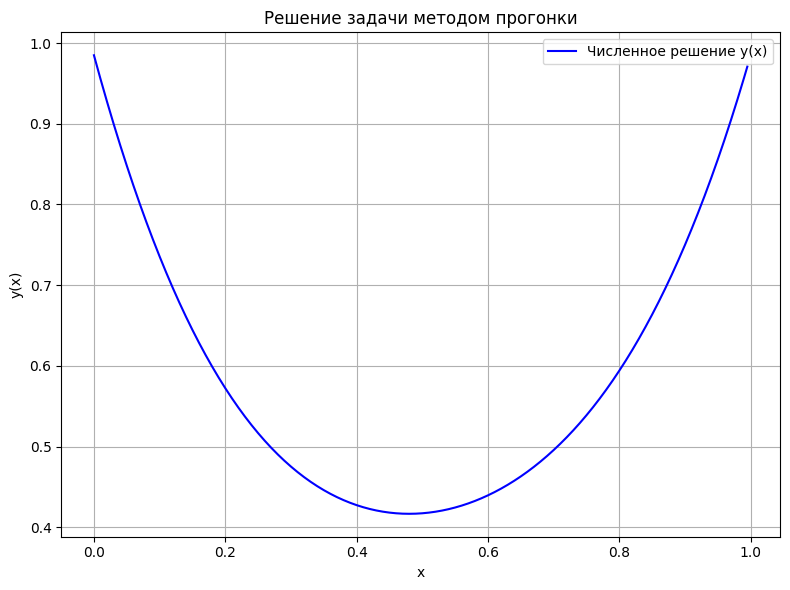

In [9]:
# Прямой ход метода прогонки
alpha = np.zeros(len(x))
beta = np.zeros(len(x))
gamma = np.zeros(len(x))

# Инициализация для первого узла (n = 1)
alpha[1] = 1 / B[0]
beta[1] = 1 / B[0]
gamma[1] = -F[0] / B[0]

# Основной цикл прямого хода (n = 2 -> N)
for i in range(1, N):
    alpha[i + 1] = 1 / (B[i] - alpha[i])
    beta[i + 1] = (beta[i] - F[i]) / (B[i] - alpha[i])
    gamma[i + 1] = gamma[i] / (B[i] - alpha[i])

# Условия для последнего узла (n = N+1, где N+1 == 0)
alpha[0] = 1 / (B[N] - alpha[N])
beta[0] = (beta[N] - F[N]) / (B[N] - alpha[N])
gamma[0] = gamma[N] / (B[N] - alpha[N])

# Обратный ход метода прогонки
mu = np.zeros(len(x))  # Коэффициенты μ
nu = np.zeros(len(x))  # Коэффициенты ν

# Инициализация для последнего узла (n = N)
mu[N] = -1 / (alpha[N] + gamma[N] - B[N])
nu[N] = (F[N] - beta[N]) / (alpha[N] + gamma[N] - B[N])

# Основной цикл обратного хода (n = N-1 -> 0)
for i in range(N, 0, -1):
    mu[i - 1] = alpha[i] * mu[i] + gamma[i] * mu[N]
    nu[i - 1] = beta[i] + alpha[i] * nu[i] + gamma[i] * nu[N]

# Вычисление решения
y = np.zeros(len(x))  # Решение y на сетке

# Условие для первого узла (n = 0)
y[0] = nu[0] / (1 - mu[0])

# Основной цикл вычисления решения (n = 1 -> N)
for i in range(1, N + 1):
    y[i - 1] = alpha[i] * (mu[i] * y[0] + nu[i]) + beta[i] + gamma[i] * (mu[N] * y[0] + nu[N])

# Условие для последнего узла (n = N+1, где N+1 == 0)
y[N] = alpha[0] * (mu[0] * y[0] + nu[0]) + beta[0] + gamma[0] * (mu[N] * y[0] + nu[N])

# Построение графика решения
plt.figure(figsize=(8, 6))
plt.plot(x, y, color='blue', label='Численное решение y(x)')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Решение задачи методом прогонки')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
